In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
import os
import cv2
import ast

In [2]:
# function to return a vector of frequency of all intensities from 0 to 255

def get_img_vector(img):
    img_vector = np.zeros(256)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            img_vector[img[i][j]] += 1
    return img_vector


#! function to calculate euclidean distance between two vectors
def euclidean_distance(vector1, vector2):
    try: 
        distance = 0.0
        for i in range(len(vector1)):
            distance += np.square(vector1[i] - vector2[i])
        distance = np.sqrt(distance)
        return distance
    except Exception as e:
        print("Error")
        print(e)
        # print(i,j)
        return 0

# function to calculate manhattan distance between two vectors
def manhattan_distance(vector1, vector2):
    return np.sum(np.abs(vector1 - vector2))

In [3]:

# functions for file handling

def formatString(string):
    string = string.replace("array([", "[")
    string = string.replace("]),array([", "],[")
    string = string.replace("])", "]")
    return string


def convertToArray(string):
    listArr = ast.literal_eval(string)
    return listArr


def tupleToList(listArr):
    array = []
    for i in range(len(listArr)):
        array.append(listArr[i])
    return array

def loadFile(path):
    with open(path, 'r') as f:
        vector = f.read()
        vector = formatString(vector)
        vector = convertToArray(vector)
        vector = tupleToList(vector)
        f.close()
    return vector

        
def saveFile(path, vector):
    with open(path, 'w') as f:
        f.write(str(vector))
        f.close()

In [4]:

# read clusters from file
actinic_keratosis_train_clusters = loadFile("../features/sharpened/clusters_sharpened/actinic_keratosis_train_clusters_0.008.txt")
basal_cell_carcinoma_train_clusters = loadFile("../features/sharpened/clusters_sharpened/basal_cell_carcinoma_train_clusters_0.008.txt")
dermatofibroma_train_clusters = loadFile("../features/sharpened/clusters_sharpened/dermatofibroma_train_clusters_0.008.txt")
melanoma_train_clusters = loadFile("../features/sharpened/clusters_sharpened/melanoma_train_clusters_0.05.txt")
nevus_train_clusters = loadFile("../features/sharpened/clusters_sharpened/nevus_train_clusters_0.05.txt")
pigmented_benign_keratosis_train_clusters = loadFile("../features/sharpened/clusters_sharpened/pigmented_benign_keratosis_train_clusters_0.008.txt")
seborrheic_keratosis_train_clusters = loadFile("../features/sharpened/clusters_sharpened/seborrheic_keratosis_train_clusters_0.05.txt")
squamous_cell_carcinoma_train_clusters = loadFile("../features/sharpened/clusters_sharpened/squamous_cell_carcinoma_train_clusters_0.008.txt")
vascular_lesion_train_clusters = loadFile("../features/sharpened/clusters_sharpened/vascular_lesion_train_clusters_0.008.txt")

In [5]:

# get the average of each sub cluster

actinic_keratosis_prototypes = []
for i in range(0, len(actinic_keratosis_train_clusters)):
    actinic_keratosis_prototypes.append(np.mean(actinic_keratosis_train_clusters[i], axis=0))

basal_cell_carcinoma_prototypes = []
for i in range(0, len(basal_cell_carcinoma_train_clusters)):
    basal_cell_carcinoma_prototypes.append(np.mean(basal_cell_carcinoma_train_clusters[i], axis=0))

dermatofibroma_prototypes = []
for i in range(0, len(dermatofibroma_train_clusters)):
    dermatofibroma_prototypes.append(np.mean(dermatofibroma_train_clusters[i], axis=0))

melanoma_prototypes = []
for i in range(0, len(melanoma_train_clusters)):
    melanoma_prototypes.append(np.mean(melanoma_train_clusters[i], axis=0))

nevus_prototypes = []
for i in range(0, len(nevus_train_clusters)):
    nevus_prototypes.append(np.mean(nevus_train_clusters[i], axis=0))

pigmented_benign_keratosis_prototypes = []
for i in range(0, len(pigmented_benign_keratosis_train_clusters)):
    pigmented_benign_keratosis_prototypes.append(np.mean(pigmented_benign_keratosis_train_clusters[i], axis=0))

seborrheic_keratosis_prototypes = []
for i in range(0, len(seborrheic_keratosis_train_clusters)):
    seborrheic_keratosis_prototypes.append(np.mean(seborrheic_keratosis_train_clusters[i], axis=0))

squamous_cell_carcinoma_prototypes = []
for i in range(0, len(squamous_cell_carcinoma_train_clusters)):
    squamous_cell_carcinoma_prototypes.append(np.mean(squamous_cell_carcinoma_train_clusters[i], axis=0))

vascular_lesion_prototypes = []
for i in range(0, len(vascular_lesion_train_clusters)):
    vascular_lesion_prototypes.append(np.mean(vascular_lesion_train_clusters[i], axis=0))

# print number of prototypes
print("Number of actinic_keratosis_prototypes: ", len(actinic_keratosis_prototypes))
print("Number of basal_cell_carcinoma_prototypes: ", len(basal_cell_carcinoma_prototypes))
print("Number of dermatofibroma_prototypes: ", len(dermatofibroma_prototypes))
print("Number of melanoma_prototypes: ", len(melanoma_prototypes))
print("Number of nevus_prototypes: ", len(nevus_prototypes))
print("Number of pigmented_benign_keratosis_prototypes: ", len(pigmented_benign_keratosis_prototypes))
print("Number of seborrheic_keratosis_prototypes: ", len(seborrheic_keratosis_prototypes))
print("Number of squamous_cell_carcinoma_prototypes: ", len(squamous_cell_carcinoma_prototypes))
print("Number of vascular_lesion_prototypes: ", len(vascular_lesion_prototypes))


Number of actinic_keratosis_prototypes:  31
Number of basal_cell_carcinoma_prototypes:  84
Number of dermatofibroma_prototypes:  32
Number of melanoma_prototypes:  114
Number of nevus_prototypes:  128
Number of pigmented_benign_keratosis_prototypes:  97
Number of seborrheic_keratosis_prototypes:  15
Number of squamous_cell_carcinoma_prototypes:  46
Number of vascular_lesion_prototypes:  62


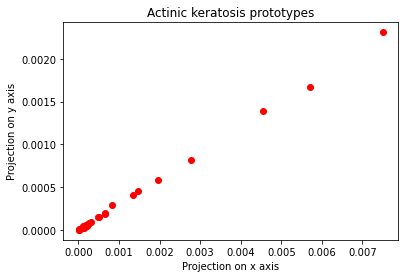

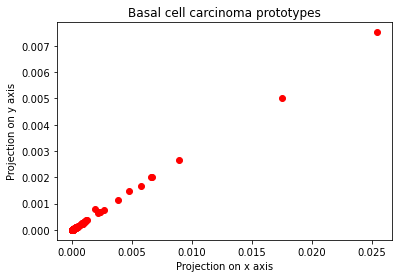

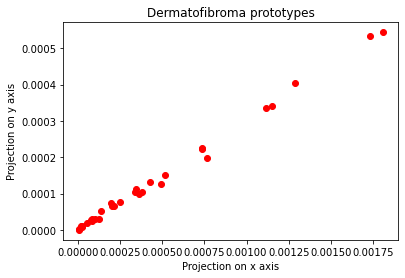

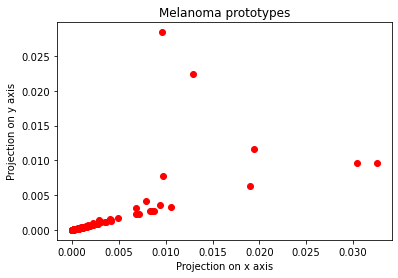

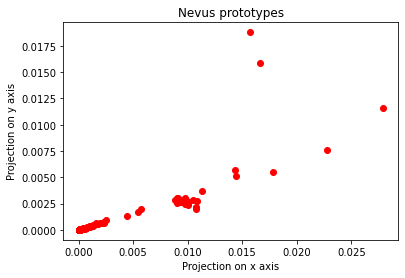

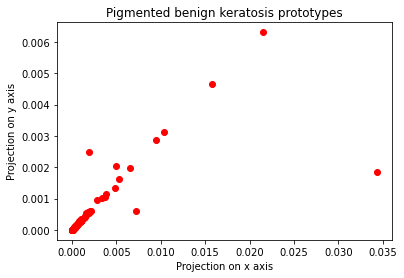

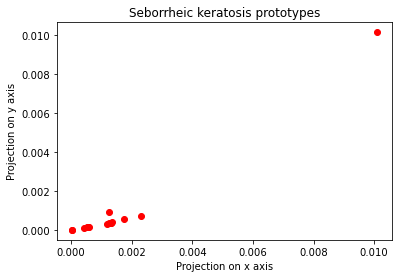

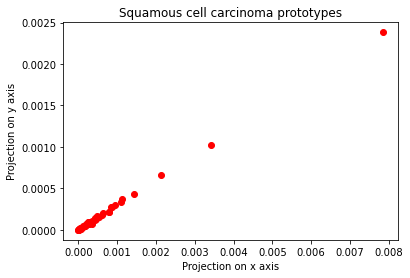

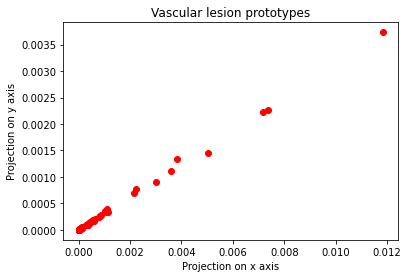

In [7]:

# projection of prototypes in 2D space

for i in range(0, len(actinic_keratosis_prototypes)):
    plt.scatter(actinic_keratosis_prototypes[i][0], actinic_keratosis_prototypes[i][1], color='red')
plt.title("Actinic keratosis prototypes")
plt.xlabel("Projection on x axis")
plt.ylabel("Projection on y axis")
plt.show()

for i in range(0, len(basal_cell_carcinoma_prototypes)):
    plt.scatter(basal_cell_carcinoma_prototypes[i][0], basal_cell_carcinoma_prototypes[i][1], color='red')
plt.title("Basal cell carcinoma prototypes")
plt.xlabel("Projection on x axis")
plt.ylabel("Projection on y axis")
plt.show()

for i in range(0, len(dermatofibroma_prototypes)):
    plt.scatter(dermatofibroma_prototypes[i][0], dermatofibroma_prototypes[i][1], color='red')
plt.title("Dermatofibroma prototypes")
plt.xlabel("Projection on x axis")
plt.ylabel("Projection on y axis")
plt.show()

for i in range(0, len(melanoma_prototypes)):
    plt.scatter(melanoma_prototypes[i][0], melanoma_prototypes[i][1], color='red')
plt.title("Melanoma prototypes")
plt.xlabel("Projection on x axis")
plt.ylabel("Projection on y axis")
plt.show()

for i in range(0, len(nevus_prototypes)):
    plt.scatter(nevus_prototypes[i][0], nevus_prototypes[i][1], color='red')
plt.title("Nevus prototypes")
plt.xlabel("Projection on x axis")
plt.ylabel("Projection on y axis")
plt.show()

for i in range(0, len(pigmented_benign_keratosis_prototypes)):
    plt.scatter(pigmented_benign_keratosis_prototypes[i][0], pigmented_benign_keratosis_prototypes[i][1], color='red')
plt.title("Pigmented benign keratosis prototypes")
plt.xlabel("Projection on x axis")
plt.ylabel("Projection on y axis")
plt.show()

for i in range(0, len(seborrheic_keratosis_prototypes)):
    plt.scatter(seborrheic_keratosis_prototypes[i][0], seborrheic_keratosis_prototypes[i][1], color='red')
plt.title("Seborrheic keratosis prototypes")
plt.xlabel("Projection on x axis")
plt.ylabel("Projection on y axis")
plt.show()

for i in range(0, len(squamous_cell_carcinoma_prototypes)):
    plt.scatter(squamous_cell_carcinoma_prototypes[i][0], squamous_cell_carcinoma_prototypes[i][1], color='red')
plt.title("Squamous cell carcinoma prototypes")
plt.xlabel("Projection on x axis")
plt.ylabel("Projection on y axis")
plt.show()

for i in range(0, len(vascular_lesion_prototypes)):
    plt.scatter(vascular_lesion_prototypes[i][0], vascular_lesion_prototypes[i][1], color='red')
plt.title("Vascular lesion prototypes")
plt.xlabel("Projection on x axis")
plt.ylabel("Projection on y axis")
plt.show()



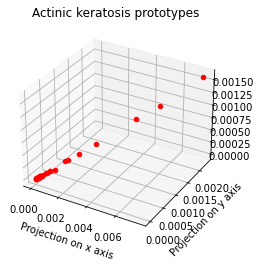

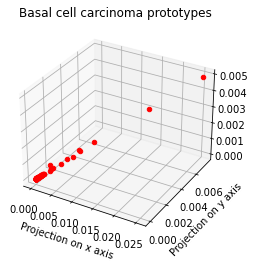

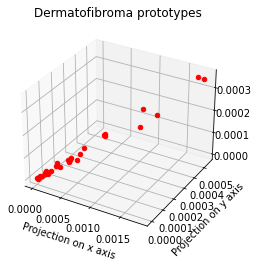

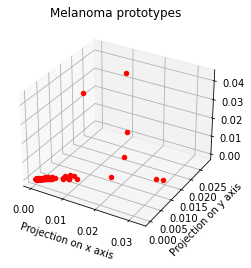

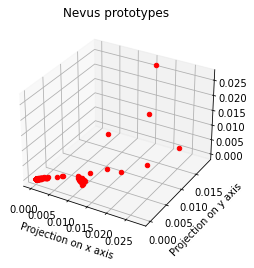

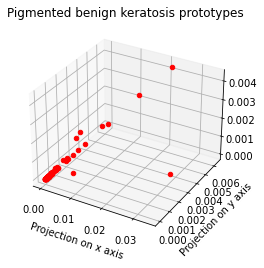

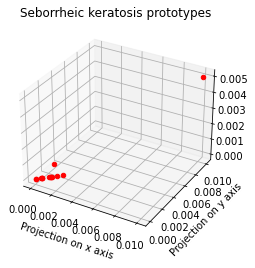

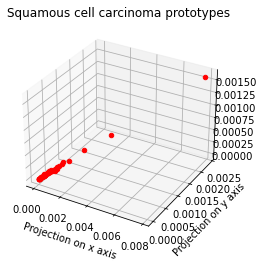

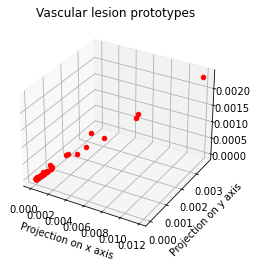

In [8]:

# plot prototypes in 3D space

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(0, len(actinic_keratosis_prototypes)):
    ax.scatter(actinic_keratosis_prototypes[i][0], actinic_keratosis_prototypes[i][1], actinic_keratosis_prototypes[i][2], color='red')
plt.title("Actinic keratosis prototypes")
plt.xlabel("Projection on x axis")
plt.ylabel("Projection on y axis")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(0, len(basal_cell_carcinoma_prototypes)):
    ax.scatter(basal_cell_carcinoma_prototypes[i][0], basal_cell_carcinoma_prototypes[i][1], basal_cell_carcinoma_prototypes[i][2], color='red')
plt.title("Basal cell carcinoma prototypes")
plt.xlabel("Projection on x axis")
plt.ylabel("Projection on y axis")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(0, len(dermatofibroma_prototypes)):
    ax.scatter(dermatofibroma_prototypes[i][0], dermatofibroma_prototypes[i][1], dermatofibroma_prototypes[i][2], color='red')
plt.title("Dermatofibroma prototypes")
plt.xlabel("Projection on x axis")
plt.ylabel("Projection on y axis")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(0, len(melanoma_prototypes)):
    ax.scatter(melanoma_prototypes[i][0], melanoma_prototypes[i][1], melanoma_prototypes[i][2], color='red')
plt.title("Melanoma prototypes")
plt.xlabel("Projection on x axis")
plt.ylabel("Projection on y axis")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(0, len(nevus_prototypes)):
    ax.scatter(nevus_prototypes[i][0], nevus_prototypes[i][1], nevus_prototypes[i][2], color='red')
plt.title("Nevus prototypes")
plt.xlabel("Projection on x axis")
plt.ylabel("Projection on y axis")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(0, len(pigmented_benign_keratosis_prototypes)):
    ax.scatter(pigmented_benign_keratosis_prototypes[i][0], pigmented_benign_keratosis_prototypes[i][1], pigmented_benign_keratosis_prototypes[i][2], color='red')
plt.title("Pigmented benign keratosis prototypes")
plt.xlabel("Projection on x axis")
plt.ylabel("Projection on y axis")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(0, len(seborrheic_keratosis_prototypes)):
    ax.scatter(seborrheic_keratosis_prototypes[i][0], seborrheic_keratosis_prototypes[i][1], seborrheic_keratosis_prototypes[i][2], color='red')
plt.title("Seborrheic keratosis prototypes")
plt.xlabel("Projection on x axis")
plt.ylabel("Projection on y axis")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(0, len(squamous_cell_carcinoma_prototypes)):
    ax.scatter(squamous_cell_carcinoma_prototypes[i][0], squamous_cell_carcinoma_prototypes[i][1], squamous_cell_carcinoma_prototypes[i][2], color='red')
plt.title("Squamous cell carcinoma prototypes")
plt.xlabel("Projection on x axis")
plt.ylabel("Projection on y axis")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(0, len(vascular_lesion_prototypes)):
    ax.scatter(vascular_lesion_prototypes[i][0], vascular_lesion_prototypes[i][1], vascular_lesion_prototypes[i][2], color='red')
plt.title("Vascular lesion prototypes")
plt.xlabel("Projection on x axis")
plt.ylabel("Projection on y axis")
plt.show()

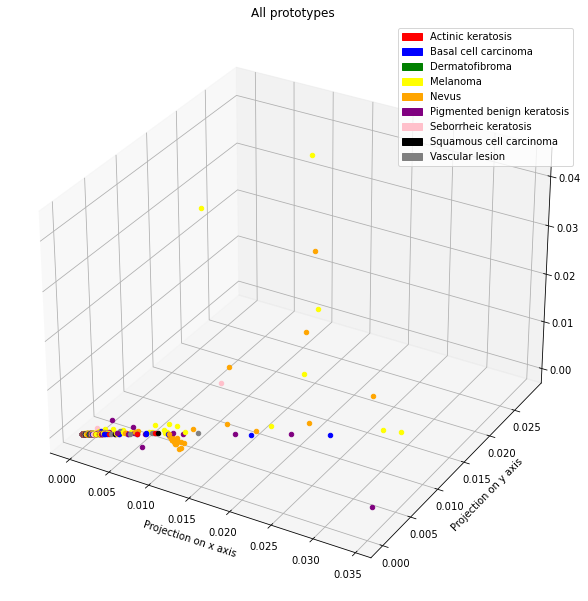

In [10]:

# plot all prototypes in same 3d space

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# increase the size of graph
fig.set_size_inches(18.5, 10.5)

for i in range(0, len(actinic_keratosis_prototypes)):
    ax.scatter(actinic_keratosis_prototypes[i][0], actinic_keratosis_prototypes[i][1], actinic_keratosis_prototypes[i][2], color='red')
for i in range(0, len(basal_cell_carcinoma_prototypes)):
    ax.scatter(basal_cell_carcinoma_prototypes[i][0], basal_cell_carcinoma_prototypes[i][1], basal_cell_carcinoma_prototypes[i][2], color='blue')
for i in range(0, len(dermatofibroma_prototypes)):
    ax.scatter(dermatofibroma_prototypes[i][0], dermatofibroma_prototypes[i][1], dermatofibroma_prototypes[i][2], color='green')
for i in range(0, len(melanoma_prototypes)):
    ax.scatter(melanoma_prototypes[i][0], melanoma_prototypes[i][1], melanoma_prototypes[i][2], color='yellow')
for i in range(0, len(nevus_prototypes)):
    ax.scatter(nevus_prototypes[i][0], nevus_prototypes[i][1], nevus_prototypes[i][2], color='orange')
for i in range(0, len(pigmented_benign_keratosis_prototypes)):
    ax.scatter(pigmented_benign_keratosis_prototypes[i][0], pigmented_benign_keratosis_prototypes[i][1], pigmented_benign_keratosis_prototypes[i][2], color='purple')
for i in range(0, len(seborrheic_keratosis_prototypes)):
    ax.scatter(seborrheic_keratosis_prototypes[i][0], seborrheic_keratosis_prototypes[i][1], seborrheic_keratosis_prototypes[i][2], color='pink')
for i in range(0, len(squamous_cell_carcinoma_prototypes)):
    ax.scatter(squamous_cell_carcinoma_prototypes[i][0], squamous_cell_carcinoma_prototypes[i][1], squamous_cell_carcinoma_prototypes[i][2], color='black')
for i in range(0, len(vascular_lesion_prototypes)):
    ax.scatter(vascular_lesion_prototypes[i][0], vascular_lesion_prototypes[i][1], vascular_lesion_prototypes[i][2], color='grey')
plt.title("All prototypes")
plt.xlabel("Projection on x axis")
plt.ylabel("Projection on y axis")

# legend
red_patch = mpatches.Patch(color='red', label='Actinic keratosis')
blue_patch = mpatches.Patch(color='blue', label='Basal cell carcinoma')
green_patch = mpatches.Patch(color='green', label='Dermatofibroma')
yellow_patch = mpatches.Patch(color='yellow', label='Melanoma')
orange_patch = mpatches.Patch(color='orange', label='Nevus')
purple_patch = mpatches.Patch(color='purple', label='Pigmented benign keratosis')
pink_patch = mpatches.Patch(color='pink', label='Seborrheic keratosis')
black_patch = mpatches.Patch(color='black', label='Squamous cell carcinoma')
grey_patch = mpatches.Patch(color='grey', label='Vascular lesion')

plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, orange_patch, purple_patch, pink_patch, black_patch, grey_patch])
plt.show()

In [12]:

# # save all the prototypes

# saveFile("../features/sharpened/prototypes_sharpened/actinic_keratosis_prototypes_0.008.txt", actinic_keratosis_prototypes)
# saveFile("../features/sharpened/prototypes_sharpened/basal_cell_carcinoma_prototypes_0.008.txt", basal_cell_carcinoma_prototypes)
# saveFile("../features/sharpened/prototypes_sharpened/dermatofibroma_prototypes_0.008.txt", dermatofibroma_prototypes)
# saveFile("../features/sharpened/prototypes_sharpened/melanoma_prototypes_0.05.txt", melanoma_prototypes)
# saveFile("../features/sharpened/prototypes_sharpened/nevus_prototypes_0.05.txt", nevus_prototypes)
# saveFile("../features/sharpened/prototypes_sharpened/pigmented_benign_keratosis_prototypes_0.008.txt", pigmented_benign_keratosis_prototypes)
# saveFile("../features/sharpened/prototypes_sharpened/seborrheic_keratosis_prototypes_0.05.txt", seborrheic_keratosis_prototypes)
# saveFile("../features/sharpened/prototypes_sharpened/squamous_cell_carcinoma_prototypes_0.008.txt", squamous_cell_carcinoma_prototypes)
# saveFile("../features/sharpened/prototypes_sharpened/vascular_lesion_prototypes_0.008.txt", vascular_lesion_prototypes)